## Environment

# Getting Started with Neural Networks 
* Core components of neural networks
* An introduction to Keras
* A first look at a nerual network (Chapter 2.1)
* Using neural networks to solve basic classification and regression problems
  - Classifying movie reviews as positive and negative (binary classification)
  - Classifying news wires by topic (multiclass classification)
  - Estimating the price of a house, given real-estate data (regression)

## Anatomy of a Neural Network

Training a neural network revolves around the following objects: 
* `Layers`(層), which are combined into a `network`(神經網路) (or `model` 模型)
* The `input data` (輸入資料) and corresponding `targets` (目標)
* The `loss function` (損失函數), which defines the feedback signal used for learning
* The `optimizer`(優化器), which determines how learning proceeds.  

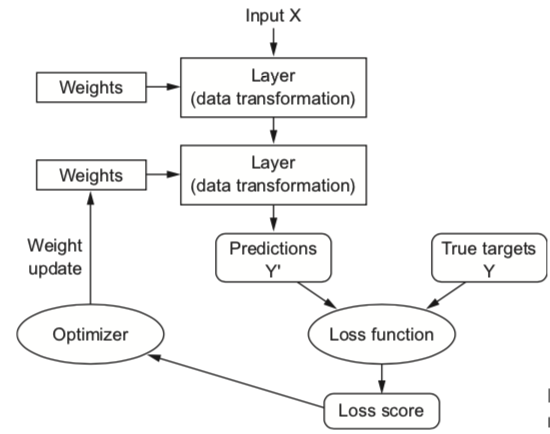

The `network`, composed of `layers` that are chained together, maps the `input data` to predictions. The `loss function` then compares these predictions to the `targets`, producing a loss value: a measure of how well the network's predictions match what are expected. The `optimizer`
uses this loss value to update the network's weights.  

### Layers: the building blocks of deep learning

The fundamental data structure in neural networks is the `layer`.

A layer is a `data-processing module` that takes as input one or more tensors and that outputs one or more tensors.

Some layers are stateless, but more frequently layers have a state: the layer’s `weights`(權重), one or several tensors learned with stochastic gradient descent, which together contain the network’s `knowledge`.

Different layers are appropriate for different tensor formats and different types of data processing.
* `Simple vector data`, stored in `2D tensors of shape (samples, features)`, is often processed by `densely connected layers`, also called `fully connected` or `dense layers` (the Dense class in Keras).
* `Sequence data`, stored in `3D tensors of shape (samples, timesteps, features)`, is typically processed by `recurrent layers` such as an `LSTM layer`.
* `Image data`, stored in `4D tensors`, is usually processed by `2D convolution layers (Conv2D)`.

The notion of `layer compatibility`(層間相容性) here refers specifically to the fact that every layer will only accept input tensors of a certain shape and will return output tensors of a certain shape.

We’re creating a layer that will only accept as input 2D tensors where the first dimension is 784 (axis 0, the batch dimension, is unspecified, and thus any value would be accepted). This layer will return a tensor where the first dimension has been transformed to be 32.

When using Keras, you don’t have to worry about compatibility, because the layers you add to your models are `dynamically built to match the shape of the incoming layer`. 

The second layer didn’t receive an input shape argument—instead, it automatically inferred its input shape as being the output shape of the layer that came before.

### Models: networks of layers

A deep-learning model is a `directed, acyclic graph of layers`. The most common instance is a `linear stack of layers`, mapping a single input to a single output.

You’ll be exposed to a much broader variety of network topologies. Some common ones include the following:
* Two-branch networks
* Multihead networks
* Inception blocks

The topology of a network defines a `hypothesis space` (假設空間). By choosing a network topology, you constrain your space of possibilities (hypothesis space) to a specific series of tensor operations, mapping input data to output data. What you’ll then be searching for is a good set of values for the weight ten- sors involved in these tensor operations.

`Picking the right network architecture` is more an art than a science; and although there are some best practices and principles you can rely on, only `practice` can help you become a proper neural-network architect.

### Loss functions and optimizers: keys to configuring the learning process

Once the network architecture is defined, you still have to choose two more things:
* `Loss function` (`objective function` 目標函數): The quantity that will be minimized during training. It represents `a measure of success` for the task at hand.
* `Optimizer`: Determines how the network will be updated based on the loss function. It implements a specific variant of `stochastic gradient descent (SGD)` (隨機梯度下降法).

A neural network that has `multiple outputs` may have `multiple loss functions` (`one per output`). But the gradient-descent process must be based on a single scalar loss value; so, for multiloss networks, all losses are combined (via `averaging`) into a `single scalar quantity`.

Choosing the right objective function for the right problem is extremely important: your network will take any shortcut it can, to `minimize the loss`.

Just remember that all neural networks you build will be just as ruthless in lowering their loss function—so choose the objective wisely, or you’ll have to face unintended side effects.

Fortunately, when it comes to common problems such as classification, regression, and sequence prediction, there are simple guidelines you can follow to choose the correct loss. 
* `binary crossentropy` (二元交叉熵) for a `two-class classification` problem
* `categorical crossentropy` (二元交叉熵) for a `many-class classification` problem
* `mean-squared error` (均方差) for a `regression` problem
* `connectionist temporal classification (CTC)` (連結時序分類) for a `sequence-learning` problem

## Introduction to Keras

Keras website: https://keras.io/ 

`Keras` is a deep-learning framework for Python that provides a convenient way to define and train almost any kind of deep-learning model.

Keras was initially developed for researchers, with the aim of enabling fast experimentation.

Keras has the following `key features`:
* It allows `the same code` to run seamlessly `on CPU or GPU`.
* It has a `user-friendly API` that makes it easy to quickly prototype deep-learning models.
* It has `built-in support` for `convolutional networks (for computer vision)`, `recurrent networks (for sequence processing)`, and `any combination of both`.
* It supports arbitrary network architectures: multi-input or multi-output models, layer sharing, model sharing, and so on. This means Keras is appropriate for building essentially `any deep-learning model`, `from a generative adversarial network to a neural Turing machine`.

Keras is distributed under the permissive `MIT license`, which means it can be freely used in `commercial projects`.

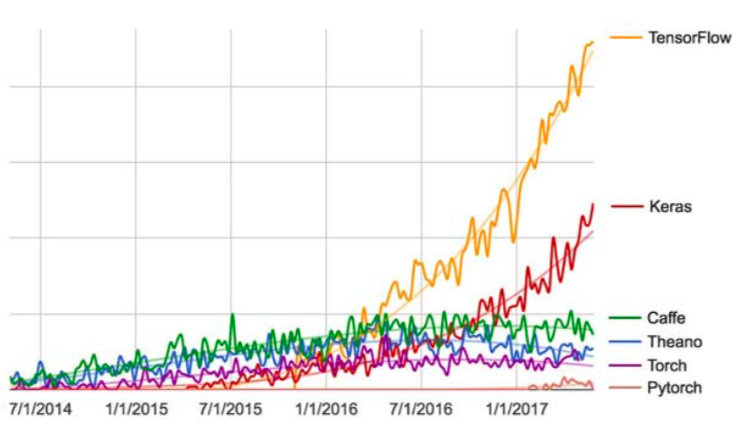

### Keras, TensorFlow, Theano, and CNTK

Keras is a `model-level library`, providing `high-level building blocks` for developing deep-learning models. It doesn’t handle low-level operations such as tensor manipulation and differentiation. Instead, it relies on a specialized, well-optimized tensor library to do so, serving as the `backend engine` of Keras.

Rather than choosing a single tensor library and tying the implementation of Keras to that library, Keras handles the problem in a modular way; thus several different backend engines can be plugged seamlessly into Keras. `Any piece of code that you write with Keras can be run with any of these backends without having to change anything in the code`.
* `Theano` (http://deeplearning.net/software/theano) is developed by the MILA lab at `Université de Montréal`
* `TensorFlow` (www.tensorflow.org) is developed by `Google`
* `CNTK` (https://github.com/Microsoft/CNTK) is developed by `Microsoft`

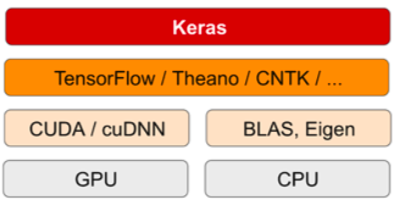

We recommend using the `TensorFlow backend` as the default for most of your deep-learning needs, because it’s the most widely adopted, scalable, and production ready.

Via TensorFlow, Keras is able to run seamlessly on both CPUs and GPUs. When running `on CPU`, TensorFlow is itself wrapping a low-level library for tensor operations called `Eigen`. `On GPU`, TensorFlow wraps a library of well-optimized deep-learning operations called the `NVIDIA CUDA Deep Neural Network library (cuDNN)`.

### Developing with Keras: a quick overview

`The typical Keras workflow`:
1. `Define your training data`: input tensors and target tensors.
2. `Define a network of layers` (or `model`) that maps your inputs to your targets.
3. `Configure the learning process` by choosing a loss function, an optimizer, and some metrics to monitor.
4. `Iterate on your training data` by calling the fit( ) method of your model.

There are two ways to define a model: 
* `The Sequential class`(序列式): only for linear stacks of layers, which is the most common network architecture.
* `The functional API`(函數式): for directed acyclic graphs of layers, which lets you build completely arbitrary architectures.

Here’s a two-layer model defined using the Sequential class (`note that we’re passing the expected shape of the input data to the first layer`):

And here’s the same model defined using the functional API:

With the functional API, you’re manipulating the data tensors that the model processes and applying layers to this tensor as if they were functions.

Once your model architecture is defined, it doesn’t matter whether you used a Sequential model or the functional API. All of the following steps are the same.

`The learning process is configured in the compilation step`, where you specify the optimizer and loss function(s) that the model should use, as well as the metrics you want to monitor during training.

Finally, the learning process consists of passing Numpy arrays of input data (and the corresponding target data) to the model via the `fit( ) method`, similar to what you would do in Scikit-Learn and several other machine-learning libraries:

## A first look at a nerual network

We will now take a look at a first concrete example of a neural network, which makes use of the Python library Keras to learn to classify hand-written digits. The problem we are trying to solve here is to `classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 categories (0 to 9)`.

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.3.1'

### The MNIST Dataset

The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been around for almost as long as the field itself and has been very intensively studied. It's a set of `60,000 training images`, plus `10,000 test images`, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [2]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images and train_labels form the "training set", the data that the model will learn from. The model will then be tested on the "test set", test_images and test_labels.

`Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging from 0 to 9`. There is a `one-to-one correspondence` between the images and the labels.

Let's have a look at the training data:

In [3]:
train_images.shape

(60000, 28, 28)

In [4]:
len(train_labels)

60000

In [5]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the test data:

In [6]:
test_images.shape

(10000, 28, 28)

In [7]:
len(test_labels)

10000

In [8]:
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

Our workflow will be as follow: first we will present our neural network with the training data, train_images and train_labels. The network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for test_images, and we will verify if these predictions match the labels from test_labels.

Let's build our network

In [9]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
network.add(layers.Dense(10, activation='softmax'))

The core building block of neural networks is the "layer", a data-processing module which you can conceive as a "filter" for data. Some data comes in, and comes out in a more useful form.

Precisely, `layers extract representations out of the data` fed into them -- hopefully representations that are more meaningful for the problem at hand. Most of deep learning really consists of chaining together simple layers which will implement a form of progressive "data distillation".

Here our network consists of a sequence of two Dense layers, which are `densely-connected`(緊密連接) (also called `"fully-connected"` 全連接) neural layers. The second (and last) layer is a 10-way `"softmax"` layer, which means it will return an array of 10 probability scores (summing to 1). Each score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* `A loss function`: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be able to steer itself in the right direction.
* `An optimizer`: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* `Metrics` to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly classified).

In [10]:
network.compile(optimizer='rmsprop',
                loss='categorical_crossentropy',
                metrics=['accuracy'])

Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in the [0, 1] interval. 

Previously, our training images for instance were stored in an array of shape (60000, 28, 28) of type uint8 with values in the [0, 255] interval. We transform it into a float32 array of shape (60000, 28 * 28) with values between 0 and 1.

In [11]:
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

We also need to categorically encode the labels

In [12]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

We are now ready to train our network, which in Keras is done via a call to the fit method of the network: we "fit" the model to its training data.

In [13]:
network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.2545 - accuracy: 0.9273
Epoch 2/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.1029 - accuracy: 0.9693
Epoch 3/5
60000/60000 [==============================] - 2s 33us/step - loss: 0.0673 - accuracy: 0.9798
Epoch 4/5
60000/60000 [==============================] - 2s 34us/step - loss: 0.0490 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 2s 35us/step - loss: 0.0373 - accuracy: 0.9886


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over the training data.

We quickly reach an accuracy of 0.988 (i.e. 98.8%) on the training data. Now let's check that our model performs well on the test set too:

In [14]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

10000/10000 [==============================] - 0s 31us/step


In [15]:
print('test_acc:', test_acc)

test_acc: 0.9807999730110168


Our test set accuracy turns out to be 97.8% -- that's quite a bit lower than the training set accuracy.

This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in less than 20 lines of Python code.

## Classifying movie reviews: a binary classification example

`Two-class classification`, or `binary classification`, may be the most widely applied kind of machine learning problem.

In this example, we will learn to `classify movie reviews into "positive" reviews and "negative" reviews`, just based on the text content of the reviews.

In [16]:
import keras
keras.__version__

'2.3.1'

### The IMDB dataset

We'll be working with "IMDB dataset", a set of `50,000 highly-polarized reviews` from the `Internet Movie Database`. They are split into `25,000 reviews for training` and `25,000 reviews for testing`, each set consisting in `50% negative` and `50% positive reviews`.

Why do we have these two separate training and test sets?
-  Just because a model performs well on its training data doesn't mean that it will perform well on data it has never seen, and what you actually care about is your model's performance on new data

Just like the MNIST dataset, the IMDB dataset comes packaged with Keras. It has already been preprocessed: `the reviews (sequences of words) have been turned into sequences of integers, where each integer stands for a specific word in a dictionary`.

The following code will load the dataset (when you run it for the first time, about 80MB of data will be downloaded to your machine):

In [17]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

The argument `num_words=10000` means that we will only keep the top 10,000 most frequently occurring words in the training data. Rare words will be discarded. `This allows us to work with vector data of manageable size`.

The variables train_data and test_data are lists of reviews, `each review being a list of word indices` (encoding a sequence of words). train_labels and test_labels are lists of 0s and 1s, where `0 stands for "negative"` and `1 stands for "positive"`:

In [18]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [19]:
train_labels[0]

1

Since we restricted ourselves to the top 10,000 most frequent words, no word index will exceed 10,000:

In [20]:
max([max(sequence) for sequence in train_data])

9999

For kicks, here's how you can quickly decode one of these reviews back to English words:

In [21]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()
# We reverse it, mapping integer indices to words
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# We decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [22]:
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

### Preparing the data

We cannot feed lists of integers into a neural network. We have to turn our lists into tensors. There are two ways we could do that:
* We could `pad our lists so that they all have the same length, and turn them into an integer tensor of shape (samples, word_indices)`, then use as first layer in our network a layer capable of handling such integer tensors. (`the Embedding layer`)
* We could `one-hot-encode our lists to turn them into vectors of 0s and 1s`. Concretely, this would mean for instance turning the sequence [3, 5] into a 10,000-dimensional vector that would be all-zeros except for indices 3 and 5, which would be ones. Then we could use as first layer in our network a Dense layer, capable of handling floating point vector data.

We will go with the latter solution. Let's vectorize our data, which we will do manually for maximum clarity:

In [23]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

Here's what our samples look like now:

In [24]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

We should also vectorize our labels, which is straightforward:

In [25]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

Now our data is ready to be fed into a neural network.

### Building our network

Our input data is simply vectors, and our labels are scalars (1s and 0s): this is the easiest setup you will ever encounter. A type of 
network that performs well on such a problem would be a simple stack of fully-connected (`Dense`) layers with `relu` activations: `Dense(16, activation='relu')`

The argument being passed to each `Dense` layer (16) is the number of "hidden units" of the layer. What's a hidden unit? It's a dimension 
in the representation space of the layer.

each such `Dense` layer with a `relu` activation implements 
the following chain of tensor operations:

`output = relu(dot(W, input) + b)`

Having 16 hidden units means that the weight matrix `W` will have shape `(input_dimension, 16)`, i.e. the dot product with `W` will project the 
input data onto a 16-dimensional representation space (and then we would add the bias vector `b` and apply the `relu` operation). You can 
intuitively understand the dimensionality of your representation space as "how much freedom you are allowing the network to have when 
learning internal representations". 

Having more hidden units (a higher-dimensional representation space) allows your network to learn more 
complex representations, but it makes your network more computationally expensive and may lead to learning unwanted patterns (patterns that 
will improve performance on the training data but not on the test data).

There are two key architecture decisions to be made about such stack of dense layers:

* How many layers to use.
* How many "hidden units" to chose for each layer.

Here's what our network looks like:

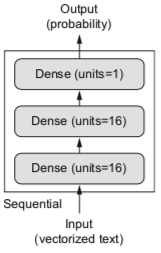

two intermediate layers with 16 hidden units each, and a third layer which will output the scalar prediction regarding the sentiment of the current review. The intermediate layers will use `relu` as their "activation function", and the final layer will use a sigmoid activation so as to output a probability (a score between 0 and 1, indicating how likely the sample is to have the target "1", i.e. how likely the review is to be positive). 

A `relu` (`rectified linear unit`) is a function meant to `zero-out negative values`, while a `sigmoid` "squashes" arbitrary values into the `[0, 1]` interval, thus outputting something that can be interpreted as a probability.

And here's the Keras implementation, very similar to the MNIST example you saw previously:

In [26]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Since we are facing a `binary classification` problem and the output of our network is a probability (we end our network with a single-unit layer with a sigmoid activation), is it best to use the `binary_crossentropy loss`.

Crossentropy is a quantity from the field of Information Theory, that measures the "distance" between probability distributions, or in our case, between the ground-truth distribution and our predictions.

Here's the step where we configure our model with the rmsprop optimizer and the binary_crossentropy loss function. Note that we will also monitor accuracy during training

In [27]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

We are passing our optimizer, loss function and metrics as strings, which is possible because `rmsprop`, `binary_crossentropy` and `accuracy` are packaged as part of Keras. 

Sometimes you may want to configure the parameters of your optimizer, or pass a custom loss function or metric function. This former can be done by passing an optimizer class instance as the `optimizer` argument:

In [28]:
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

The latter can be done by passing function objects as the loss or metrics arguments:

In [29]:
from keras import losses
from keras import metrics

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

### Validating our approach

In order to monitor during training the accuracy of the model on data that it has never seen before, we will create a "validation set" by 
setting apart 10,000 samples from the original training data:

In [30]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

We will now train our model for 20 `epochs` (20 `iterations over all samples in the x_train and y_train tensors`), in `mini-batches` of 512 samples. At this same time we will monitor loss and accuracy on the 10,000 samples that we set apart. This is done by passing the validation data as the `validation_data` argument:

In [31]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 149us/step - loss: 0.5173 - binary_accuracy: 0.7861 - val_loss: 0.3961 - val_binary_accuracy: 0.8586
Epoch 2/20
15000/15000 [==============================] - 1s 83us/step - loss: 0.3067 - binary_accuracy: 0.9030 - val_loss: 0.3126 - val_binary_accuracy: 0.8816
Epoch 3/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.2230 - binary_accuracy: 0.9286 - val_loss: 0.2787 - val_binary_accuracy: 0.8885
Epoch 4/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1775 - binary_accuracy: 0.9437 - val_loss: 0.2799 - val_binary_accuracy: 0.8874
Epoch 5/20
15000/15000 [==============================] - 1s 72us/step - loss: 0.1419 - binary_accuracy: 0.9567 - val_loss: 0.2921 - val_binary_accuracy: 0.8820
Epoch 6/20
15000/15000 [==============================] - 1s 84us/step - loss: 0.1181 - binary_accuracy: 0.9647 - val_loss: 0.3011 - val_binary_

On CPU, this will take less than two seconds per epoch -- training is over in 20 seconds. At the end of every epoch, there is a slight pause 
as the model computes its loss and accuracy on the 10,000 samples of the validation data.

Note that the call to `model.fit()` returns a `History` object. This object has a member `history`, which is a dictionary containing data 
about everything that happened during training. Let's take a look at it:

In [32]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'loss', 'binary_accuracy'])

It contains 4 entries: one per metric that was being monitored, during training and during validation. Let's use Matplotlib to plot the training and validation loss side by side, as well as the training and validation accuracy:

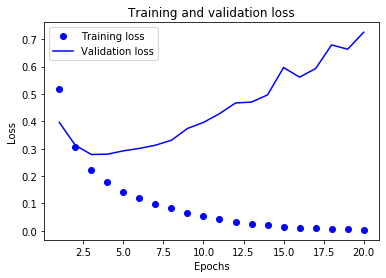

In [33]:
import matplotlib.pyplot as plt

acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

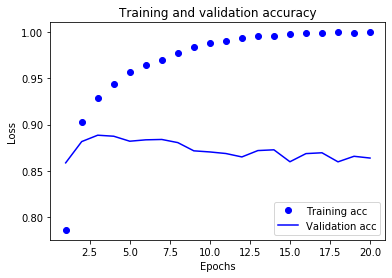

In [34]:
plt.clf()   # clear figure
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The dots are the training loss and accuracy, while the solid lines are the validation loss and accuracy. Note that your own results may vary slightly due to a different random initialization of your network.

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. That's what you would expect when running gradient descent optimization -- the quantity you are trying to minimize should get lower with every iteration.

But that isn't the case for the validation loss and accuracy: they seem to peak at the fourth epoch. This is an example of what we were warning against earlier: a model that performs better on the training data isn't necessarily a model that will do better on data it has never seen before.

In precise terms, what you are seeing is `"overfitting"`(過度配適): after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In this case, to prevent overfitting, we could simply stop training after three epochs. Let's train a new network from scratch for four epochs, then evaluate it on our test data:

In [35]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/4
25000/25000 [==============================] - 2s 61us/step - loss: 0.4547 - accuracy: 0.8216
Epoch 2/4
25000/25000 [==============================] - 1s 56us/step - loss: 0.2623 - accuracy: 0.9104
Epoch 3/4
25000/25000 [==============================] - 1s 49us/step - loss: 0.2035 - accuracy: 0.9282
Epoch 4/4
25000/25000 [==============================] - 3s 110us/step


In [36]:
results

[0.2903120255422592, 0.8857600092887878]

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.

### Using a trained network to generate predictions on new data

After having trained a network, you will want to use it in a practical setting. You can generate the likelihood of reviews being positive 
by using the `predict` method:

In [37]:
model.predict(x_test)

array([[0.2255707 ],
       [0.99886036],
       [0.66476953],
       ...,
       [0.10063473],
       [0.08674821],
       [0.5083921 ]], dtype=float32)

As you can see, the network is very confident for some samples (0.99 or more, or 0.01 or less) but less confident for others (0.6, 0.4).

### Further experiments

* We were using 2 hidden layers. Try to use 1 or 3 hidden layers and see how it affects validation and test accuracy.
* Try to use layers with more hidden units or less hidden units: 32 units, 64 units...
* Try to use the `mse` loss function instead of `binary_crossentropy`.
* Try to use the `tanh` activation (an activation that was popular in the early days of neural networks) instead of `relu`.

These experiments will help convince you that the architecture choices we have made are all fairly reasonable, although they can still be 
improved!

### Conclusions

Here's what you should take away from this example:

* There's usually quite a bit of preprocessing you need to do on your raw data in order to be able to feed it -- as tensors -- into a neural network. In the case of sequences of words, they can be encoded as binary vectors -- but there are other encoding options too.
* Stacks of `Dense` layers with `relu` activations can solve a wide range of problems (including sentiment classification), and you will likely use them frequently.
* In a binary classification problem (two output classes), your network should end with a `Dense` layer with 1 unit and a `sigmoid` activation, i.e. the output of your network should be a scalar between 0 and 1, encoding a probability.
* With such a scalar sigmoid output, on a binary classification problem, the loss function you should use is `binary_crossentropy`.
* The `rmsprop` optimizer is generally a good enough choice of optimizer, whatever your problem. That's one less thing for you to worry about.
* As they get better on their training data, neural networks eventually start _overfitting_ and end up obtaining increasingly worse results on data never-seen-before. Make sure to always monitor performance on data that is outside of the training set.


## Classifying newswires: a multi-class classification example

In the previous section we saw how to classify vector inputs into two mutually exclusive classes using a densely-connected neural network. 
But what happens when you have more than two classes? 

In this section, we will build a network to `classify Reuters newswires into 46 different mutually-exclusive topics`. Since we have many 
classes, this problem is an instance of "multi-class classification", and since `each data point should be classified into only one category`, the problem is more specifically an instance of `"single-label, multi-class classification"`. If `each data point could have belonged to multiple categories` (in our case, topics) then we would be facing a `"multi-label, multi-class classification"` problem.

In [38]:
import keras
keras.__version__

'2.3.1'

### The Reuters dataset

We will be working with the _Reuters dataset_, `a set of short newswires and their topics, published by Reuters in 1986`. It's a very simple, widely used toy dataset for `text classification`. There are `46 different topics`; some topics are more represented than others, but `each topic has at least 10 examples in the training set`.

Like IMDB and MNIST, the Reuters dataset comes packaged as part of Keras. Let's take a look right away:

In [39]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

Like with the IMDB dataset, the argument num_words=10000 restricts the data to the 10,000 most frequently occurring words found in the data.

We have 8,982 training examples and 2,246 test examples:

In [40]:
len(train_data)

8982

In [41]:
len(test_data)

2246

As with the IMDB reviews, each example is a list of integers (word indices):

In [42]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

Here's how you can decode it back to words, in case you are curious:

In [43]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# Note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [44]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

The label associated with an example is an integer between 0 and 45: a topic index.

In [45]:
train_labels[10]

3

### Preparing the data

We can vectorize the data with the exact same code as in our previous example:

In [46]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

To vectorize the labels, there are two possibilities: we could just cast the label list as an integer tensor, or we could use a "one-hot"encoding.

`One-hot encoding` is a widely used format for categorical data, also called `"categorical encoding"`. In our case, one-hot encoding of our labels consists in embedding each label as an all-zero vector with a 1 in the place of the label index.

In [47]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# Our vectorized training labels
one_hot_train_labels = to_one_hot(train_labels)
# Our vectorized test labels
one_hot_test_labels = to_one_hot(test_labels)

Note that there is a built-in way to do this in Keras, which you have already seen in action in our MNIST example:

In [48]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### Building our network

This topic classification problem looks very similar to our previous movie review classification problem: in both cases, we are trying to 
classify short snippets of text. There is however a new constraint here: the number of output classes has gone from 2 to 46, i.e. the 
dimensionality of the output space is much larger. 

In a stack of `Dense` layers like what we were using, each layer can only access information present in the output of the previous layer. 
If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each 
layer can potentially become an "information bottleneck". In our previous example, we were using 16-dimensional intermediate layers, but a 
16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may act as information bottlenecks, 
permanently dropping relevant information.

For this reason we will use larger layers. Let's go with 64 units:

In [49]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

There are two other things you should note about this architecture:

* We are ending the network with a `Dense` layer of size 46. This means that for each input sample, our network will output a 46-dimensional vector. Each entry in this vector (each dimension) will encode a different output class.
* The last layer uses a `softmax` activation. You have already seen this pattern in the MNIST example. It means that the network will output a _probability distribution_ over the 46 different output classes, i.e. for every input sample, the network will produce a 46-dimensional output vector where `output[i]` is the probability that the sample belongs to class `i`. The 46 scores will sum to 1.

The best loss function to use in this case is `categorical_crossentropy`. It measures the distance between two probability distributions: 
in our case, between the probability distribution output by our network, and the true distribution of the labels. By minimizing the distance between these two distributions, we train our network to output something as close as possible to the true labels.

In [50]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Validating our approach

Let's set apart 1,000 samples in our training data to use as a validation set:

In [51]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

Now let's train our network for 20 epochs:

In [52]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 133us/step - loss: 2.6004 - accuracy: 0.5282 - val_loss: 1.7432 - val_accuracy: 0.6520
Epoch 2/20
7982/7982 [==============================] - 1s 118us/step - loss: 1.4591 - accuracy: 0.7046 - val_loss: 1.3221 - val_accuracy: 0.7200
Epoch 3/20
7982/7982 [==============================] - 1s 115us/step - loss: 1.0766 - accuracy: 0.7783 - val_loss: 1.1331 - val_accuracy: 0.7590
Epoch 4/20
7982/7982 [==============================] - 1s 104us/step - loss: 0.8403 - accuracy: 0.8271 - val_loss: 1.0346 - val_accuracy: 0.7760
Epoch 5/20
7982/7982 [==============================] - 1s 118us/step - loss: 0.6654 - accuracy: 0.8639 - val_loss: 0.9506 - val_accuracy: 0.8030
Epoch 6/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.5270 - accuracy: 0.8925 - val_loss: 0.9186 - val_accuracy: 0.8100
Epoch 7/20
7982/7982 [==============================] - 1s 95us/step - loss:

Let's display its loss and accuracy curves:

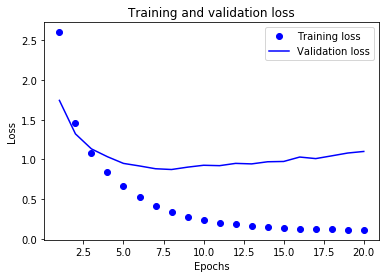

In [53]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

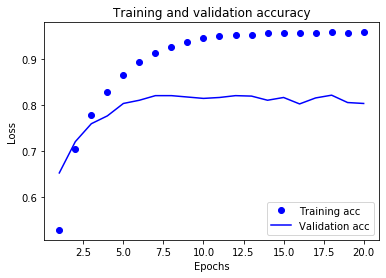

In [54]:
plt.clf()   # clear figure

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

It seems that the network starts overfitting after 8 epochs. Let's train a new network from scratch for 8 epochs, then let's evaluate it on 
the test set:

In [55]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=8,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/8
7982/7982 [==============================] - 1s 139us/step - loss: 2.6970 - accuracy: 0.4919 - val_loss: 1.8229 - val_accuracy: 0.6340
Epoch 2/8
7982/7982 [==============================] - 1s 111us/step - loss: 1.4812 - accuracy: 0.7002 - val_loss: 1.3734 - val_accuracy: 0.7090
Epoch 3/8
7982/7982 [==============================] - 1s 120us/step - loss: 1.0977 - accuracy: 0.7650 - val_loss: 1.1882 - val_accuracy: 0.7410
Epoch 4/8
7982/7982 [==============================] - 1s 76us/step - loss: 0.8679 - accuracy: 0.8156 - val_loss: 1.0967 - val_accuracy: 0.7670
Epoch 5/8
7982/7982 [==============================] - 1s 117us/step - loss: 0.6932 - accuracy: 0.8538 - val_loss: 1.0098 - val_accuracy: 0.7980
Epoch 6/8
7982/7982 [==============================] - 1s 109us/step - loss: 0.5526 - accuracy: 0.8857 - val_loss: 0.9625 - val_accuracy: 0.8010
Epoch 7/8
7982/7982 [==============================] - 1s 88us/step - loss: 0.4468 

In [56]:
results

[0.9949881034776343, 0.784060537815094]

Our approach reaches an accuracy of ~78%. With a balanced binary classification problem, the accuracy reached by a purely random classifier would be 50%, but in our case it is closer to 19%, so our results seem pretty good, at least when compared to a random baseline:

In [57]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1829919857524488

### Generating predictions on new data

We can verify that the `predict` method of our model instance returns a probability distribution over all 46 topics. Let's generate topic 
predictions for all of the test data:

In [58]:
predictions = model.predict(x_test)

Each entry in predictions is a vector of length 46:

In [59]:
predictions[0].shape

(46,)

The coefficients in this vector sum to 1:

In [60]:
np.sum(predictions[0])

1.0

The largest entry is the predicted class, i.e. the class with the highest probability:

In [61]:
np.argmax(predictions[0])

4

### A different way to handle the labels and the loss

We mentioned earlier that another way to encode the labels would be to cast them as an `integer` tensor, like such:

In [62]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing it would change is the choice of the loss function. Our previous loss, categorical_crossentropy, expects the labels to follow a categorical encoding. With integer labels, we should use `sparse_categorical_crossentropy`:

In [63]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

This new loss function is still mathematically the same as categorical_crossentropy; it just has a different interface.

### On the importance of having sufficiently large intermediate layers

We mentioned earlier that since our final outputs were 46-dimensional, we should avoid intermediate layers with much less than 46 hidden units. Now let's try to see what happens when we introduce an information bottleneck by having intermediate layers significantly less than 46-dimensional, e.g. 4-dimensional.

In [64]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 101us/step - loss: 2.8762 - accuracy: 0.3518 - val_loss: 2.2630 - val_accuracy: 0.3860
Epoch 2/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.9323 - accuracy: 0.4664 - val_loss: 1.7116 - val_accuracy: 0.6130
Epoch 3/20
7982/7982 [==============================] - 1s 90us/step - loss: 1.4591 - accuracy: 0.6486 - val_loss: 1.5072 - val_accuracy: 0.6340
Epoch 4/20
7982/7982 [==============================] - 1s 99us/step - loss: 1.2430 - accuracy: 0.6872 - val_loss: 1.4206 - val_accuracy: 0.6600
Epoch 5/20
7982/7982 [==============================] - 1s 91us/step - loss: 1.1009 - accuracy: 0.7137 - val_loss: 1.3508 - val_accuracy: 0.6760
Epoch 6/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.9855 - accuracy: 0.7338 - val_loss: 1.3297 - val_accuracy: 0.7060
Epoch 7/20
7982/7982 [==============================] - 1s 107us/step - loss: 0.

Our network now seems to peak at ~71% test accuracy, a 8% absolute drop. This drop is mostly due to the fact that we are now trying to compress a lot of information (enough information to recover the separation hyperplanes of 46 classes) into an intermediate space that is too low-dimensional. The network is able to cram most of the necessary information into these 8-dimensional representations, but not all of it.

### Further experiments

* Try using larger or smaller layers: 32 units, 128 units...
* We were using two hidden layers. Now try to use a single hidden layer, or three hidden layers.

### Wrapping up

Here's what you should take away from this example:

* If you are trying to classify data points between N classes, your network should end with a `Dense` layer of size N.
* In a single-label, multi-class classification problem, your network should end with a `softmax` activation, so that it will output a 
probability distribution over the N output classes.
* _Categorical crossentropy_ is almost always the loss function you should use for such problems. It minimizes the distance between the 
probability distributions output by the network, and the true distribution of the targets.
* There are two ways to handle labels in multi-class classification:
    ** Encoding the labels via "categorical encoding" (also known as "one-hot encoding") and using `categorical_crossentropy` as your loss 
function.
    ** Encoding the labels as integers and using the `sparse_categorical_crossentropy` loss function.
* If you need to classify data into a large number of categories, then you should avoid creating information bottlenecks in your network by having 
intermediate layers that are too small.

## Predicting house prices: a regression example

In our two previous examples, we were considering classification problems, where the goal was to predict a single discrete label of an 
input data point. 

Another common type of machine learning problem is "regression", which consists of predicting a continuous value instead of a discrete label. For instance, predicting the temperature tomorrow, given meteorological data, or predicting the time that a software project will take to complete, given its specifications.

Do not mix up "regression" with the algorithm "logistic regression": confusingly, "logistic regression" is not a regression algorithm, 
it is a classification algorithm.

In [65]:
import keras
keras.__version__

'2.3.1'

### The Boston Housing Price dataset

We will be attempting to `predict the median price of homes in a given Boston suburb in the mid-1970s`, given a few data points about the 
suburb at the time, such as the crime rate, the local property tax rate, etc.

The dataset we will be using has another interesting difference from our two previous examples: it has very few data points, only 506 in 
total, split between `404 training samples` and `102 test samples`, and `each "feature" in the input data` (e.g. the crime rate is a feature) `has a different scale`. For instance some values are proportions, which take a values between 0 and 1, others take values between 1 and 12, 
others between 0 and 100...

Let's take a look at the data:

In [66]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) =  boston_housing.load_data()

In [67]:
train_data.shape

(404, 13)

In [68]:
test_data.shape

(102, 13)

As you can see, we have 404 training samples and 102 test samples. The data comprises 13 features. The 13 features in the input data are as follow:
1. Per capita crime rate.
2. Proportion of residential land zoned for lots over 25,000 square feet.
3. Proportion of non-retail business acres per town.
4. Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
5. Nitric oxides concentration (parts per 10 million).
6. Average number of rooms per dwelling.
7. Proportion of owner-occupied units built prior to 1940.
8. Weighted distances to five Boston employment centres.
9. Index of accessibility to radial highways.
10. Full-value property-tax rate per $10,000.
11. Pupil-teacher ratio by town.
12. 1000 * (Bk - 0.63) ** 2 where Bk is the proportion of Black people by town.
13. % lower status of the population.

The targets are the median values of owner-occupied homes, in thousands of dollars:

In [69]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The prices are typically between  10,000𝑎𝑛𝑑 50,000. If that sounds cheap, remember this was the mid-1970s, and these prices are not inflation-adjusted.

### Preparing the data

It would be problematic to feed into a neural network values that all take wildly different ranges. The network might be able to automatically adapt to such heterogeneous data, but it would definitely make learning more difficult.

A widespread best practice to deal with such data is to do `feature-wise normalization`: for each feature in the input data (a column in the input data matrix), we will `subtract the mean of the feature and divide by the standard deviation`, so that the feature will be centered around 0 and will have a unit standard deviation. This is easily done in Numpy:

In [70]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

Note that the quantities that we use for normalizing the test data have been computed using the training data. We should never use in our workflow any quantity computed on the test data, even for something as simple as data normalization.

### Building our network

Because so few samples are available, we will be using a very small network with two 
hidden layers, each with 64 units. In general, the less training data you have, the worse overfitting will be, and using 
a small network is one way to mitigate overfitting.

In [71]:
from keras import models
from keras import layers

def build_model():
    # Because we will need to instantiate
    # the same model multiple times,
    # we use a function to construct it.
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Our network ends with `a single unit`, and `no activation` (i.e. it will be linear layer). This is a typical setup for scalar regression (i.e. regression where we are trying to predict a single continuous value). 

Applying an activation function would constrain the range that the output can take; for instance if we applied a `sigmoid` activation function to our last layer, the network could only learn to predict `values between 0 and 1`. Here, because the last layer is purely `linear`, the network is free to learn to predict `values in any range`.

Note that we are compiling the network with the `mse` loss function -- `Mean Squared Error`, the square of the difference between the 
predictions and the targets, a widely used loss function for regression problems.

We are also monitoring a new metric during training: `mae`. This stands for `Mean Absolute Error`. It is simply the absolute value of the 
difference between the predictions and the targets. For instance, a MAE of 0.5 on this problem would mean that our predictions are off by 
\$500 on average.

### Validating our approach using K-fold validation

To evaluate our network while we keep adjusting its parameters (such as the number of epochs used for training), we could simply split the 
data into a training set and a validation set, as we were doing in our previous examples. 

However, because we have so few data points, the validation set would end up being very small (e.g. about 100 examples). A consequence is that our validation scores may change a lot depending on _which_ data points we choose to use for validation and which we choose for training, i.e. the validation scores may have a high _variance_ with regard to the validation split. This would prevent us from reliably evaluating our 
model.

The best practice in such situations is to use K-fold cross-validation. It consists of splitting the available data into K partitions 
(typically K=4 or 5), then instantiating K identical models, and training each one on K-1 partitions while evaluating on the remaining 
partition. `The validation score` for the model used would then be `the average of the K validation scores` obtained.

In terms of code, this is straightforward:

In [72]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    # Evaluate the model on the validation data
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [73]:
all_scores

[1.8279017210006714, 2.449876308441162, 2.9091007709503174, 2.5193495750427246]

In [74]:
np.mean(all_scores)

2.426557093858719

As you can notice, the different runs do indeed show rather different validation scores, from 2.2 to 2.8. Their average (2.4) is a much more 
reliable metric than any single of these scores -- that's the entire point of K-fold cross-validation. 

Let's try training the network for a bit longer: 500 epochs. To keep a record of how well the model did at each epoch, we will modify our training loop to save the per-epoch validation score log:

In [75]:
from keras import backend as K

# Some memory clean-up
K.clear_session()

In [76]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
    print('processing fold #', i)
    # Prepare the validation data: data from partition # k
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]

    # Prepare the training data: data from all other partitions
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)

    # Build the Keras model (already compiled)
    model = build_model()
    # Train the model (in silent mode, verbose=0)
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


We can then compute the average of the per-epoch MAE scores for all folds:

In [77]:
average_mae_history = [
    np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Let's plot this:

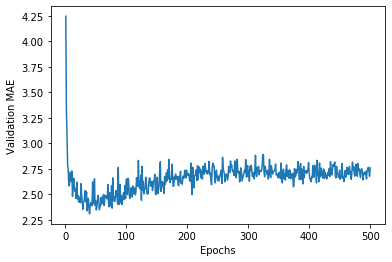

In [78]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It may be a bit hard to see the plot due to scaling issues and relatively high variance. Let's:

* Omit the first 10 data points, which are on a different scale from the rest of the curve.
* Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

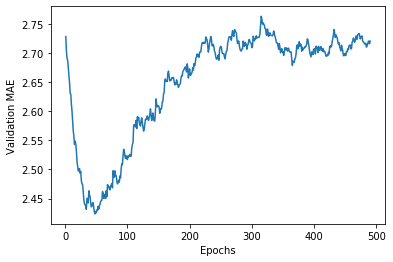

In [79]:
def smooth_curve(points, factor=0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

According to this plot, it seems that validation MAE stops improving significantly after 80 epochs. Past that point, we start overfitting.

Once we are done tuning other parameters of our model (besides the number of epochs, we could also adjust the size of the hidden layers), we can train a final "production" model on all of the training data, with the best parameters, then look at its performance on the test data:

In [80]:
# Get a fresh, compiled model.
model = build_model()
# Train it on the entirety of the data.
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 188us/step


In [81]:
test_mae_score

2.482462167739868

We are still off by about $2,765.

### Wrapping up

Here's what you should take away from this example:

* Regression is done using different loss functions from classification; `Mean Squared Error (MSE)` is a commonly used loss function for regression.
* Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally the concept of "accuracy" does not apply for regression. A common regression metric is `Mean Absolute Error (MAE)`.
* When features in the input data have values in `different ranges`, each feature should be `scaled independently as a preprocessing step`.
* When there is `little data` available, using `K-Fold validation` is a great way to reliably evaluate a model.
* When `little training data` is available, it is preferable to use a `small network` with very few hidden layers (typically only one or two), in order to avoid severe overfitting.